In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import shapiro


In [41]:
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"

df = pd.read_csv(url)

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [42]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

As we can see the dataset is imbalanced now we have to balance it


In [43]:
#Separating features and target variable
X=df.drop('Class',axis=1)
y=df['Class']

In [44]:
smote=SMOTE(sampling_strategy='minority')
X_resampled,y_resampled=smote.fit_resample(X,y)

In [45]:
#now we slpit the data into test and training respectively
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

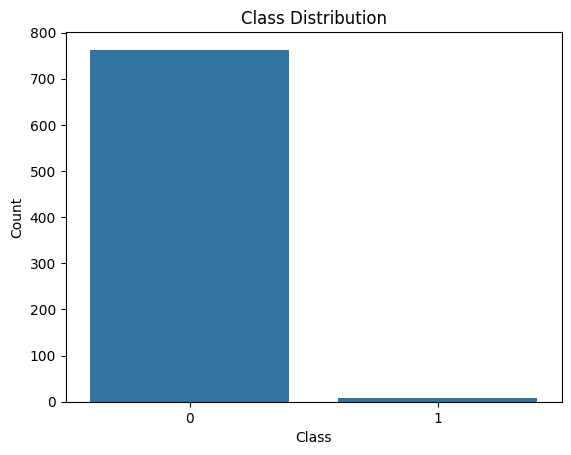

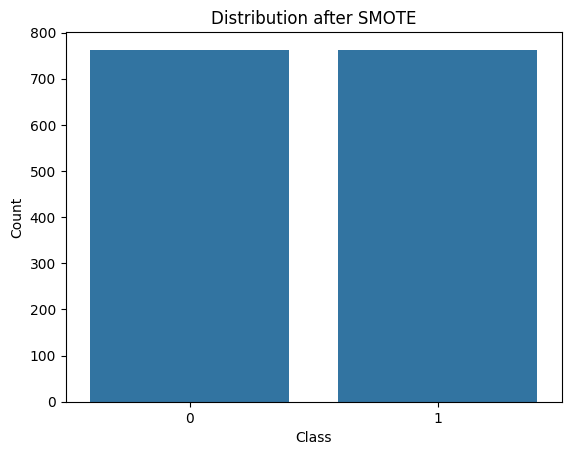

In [46]:
sns.countplot(x='Class',data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

sns.countplot(x=y_resampled)
plt.title('Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [47]:
#we can see that after appling smot we have balanced data set now we store the balanced data in new data frame
df1=pd.DataFrame(X_resampled)
df1['Class']=y_resampled
df1['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

In [48]:
#now we apply different sampling technique
#Simple Random Sampling
import math

z=1.96
p=0.5
E=0.05

Sample_size=math.ceil((z**2 * p * (1-p))/(E**2))

samples=[]
s1=df1.sample(n=Sample_size,random_state=0)

samples.append(s1)
class_count=s1['Class'].value_counts()
print(class_count)

0    200
1    185
Name: Class, dtype: int64


In [49]:
#Systematic Sampling

N=len(df1)
k=int(m.sqrt(N))
s2=df1.iloc[::k]
samples.append(s2)
class_count=s2['Class'].value_counts()
print(class_count)

0    20
1    20
Name: Class, dtype: int64


In [50]:
#Stratified Sampling

z=1.96
p=0.5
E=0.05
S=0.7

sample_size = round((z**2 * p * (1 - p)) / ((E / S)**2))

s3=df1.groupby('Class',group_keys=False).apply(lambda x:x.sample(sample_size))
samples.append(s3)

class_count=s3['Class'].value_counts()
print(class_count)

0    188
1    188
Name: Class, dtype: int64


In [51]:
# Cluster Sampling

z=1.96
p=0.5
E=0.05
C=1.5
sample_size=round((z**2*p*(1-p))/((E/C)**2))
clusters=2
df_new=df1
N = len(df1)
K = int(N/sample_size)
data = None
for k in range(K):
    sample_k = df_new.sample(sample_size)
    sample_k["cluster"] = np.repeat(k,len(sample_k))
    df_new = df_new.drop(index = sample_k.index)
    data = pd.concat([data,sample_k],axis = 0)

random_chosen_clusters = np.random.randint(0,K,size = clusters)
s4 = data[data.cluster.isin(random_chosen_clusters)]
s4.drop(['cluster'], axis=1, inplace=True)
samples.append(s4)
s4['Class'].value_counts()

1    441
0    423
Name: Class, dtype: int64

In [52]:
#Bootstrap Sampling
def bootstrap_sample(data, n_samples):


    samples = []

    for i in range(n_samples):
        sample = data.sample(len(data), replace=True)
        samples.append(sample)

    return samples

s5 = bootstrap_sample(df, 10)

first_sample = s5[0]
samples.append(s5)
print(first_sample['Class'].value_counts())



0    764
1      8
Name: Class, dtype: int64


In [53]:
# Check goodness of each sample using Shapiro-Wilk test

for i in range(5):
  print(shapiro(samples[i]))

ShapiroResult(statistic=0.17587882280349731, pvalue=0.0)
ShapiroResult(statistic=0.16605454683303833, pvalue=0.0)
ShapiroResult(statistic=0.17671221494674683, pvalue=0.0)
ShapiroResult(statistic=0.16484487056732178, pvalue=0.0)
ShapiroResult(statistic=0.15990930795669556, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [54]:
Sampling=['Simple-Random','Systematic','Stratified','Cluster','Bootstrap']
ans=pd.DataFrame(columns=Sampling, index=['SVM','Decision Tree','Random Forest','Logistic Regression','Naive Bayes'])

In [62]:
for i in range(5):
  j=0
  # xs=samples[i].drop('Class',axis=1)
  # ys=samples[i]['Class']
  xtrain, xtest, y_train, y_test = train_test_split(xs ,ys , random_state=104,test_size=0.25, shuffle=True)

  # SVM

  clf = SVC(kernel='rbf')
  clf.fit(xtrain, y_train)
  y_pred=clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j,i]=acc*100

  #  Decision Tree
  classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+2,i]=acc*100


  # RandomForest Classifier

  clf = RandomForestClassifier(n_estimators = 100)
  clf.fit(xtrain, y_train)
  y_pred = clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+3,i]=acc*100

  #  Logistic Regression

  classifier = LogisticRegression(random_state = 0,max_iter=2000)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+1,i]=acc*100


  # Applying Naive bayes

  model = GaussianNB()
  model.fit(xtrain,y_train)
  predicted= model.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+4,i]=acc*100

print(ans)

                    Simple-Random Systematic Stratified    Cluster  Bootstrap
SVM                     64.351852  64.351852  64.351852  64.351852  64.351852
Decision Tree           93.981481  93.981481  93.981481  93.981481  93.981481
Random Forest           96.759259  96.759259  96.759259  96.759259  96.759259
Logistic Regression     99.537037  99.537037  99.074074  99.537037  99.074074
Naive Bayes             93.981481  93.981481  93.981481  93.981481  93.981481


In [70]:
def highlight_max_values(df, color='green', axis=1):

    return df.style.apply(lambda x: ['background-color: {}'.format(color) if v == x.max() else '' for v in x], axis=axis)

ans.style.apply(highlight_max, axis=0)


,Simple-Random,Systematic,Stratified,Cluster,Bootstrap
SVM,64.351852,64.351852,64.351852,64.351852,64.351852
Decision Tree,93.981481,93.981481,93.981481,93.981481,93.981481
Random Forest,96.759259,96.759259,96.759259,96.759259,96.759259
Logistic Regression,99.537037,99.537037,99.074074,99.537037,99.074074
Naive Bayes,93.981481,93.981481,93.981481,93.981481,93.981481
